In [405]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug = "mouse_drug_data.csv"
clinical_trial = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df = pd.read_csv(mouse_drug)

df1= pd.read_csv(clinical_trial)

# Combine the data into a single dataset
df2=pd.merge(df,df1, on="Mouse ID")

# Store Volume data - useiloc and store 2nd rightmost column data in vol variable
vol=df2.iloc[:,-2]

# Display the data table for preview
df2.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [406]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Add .reset_index() to end of line to make it a df (has to have an index).
vol_mean=df2.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()

# Preview DataFrame

vol_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [407]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
vol_sem=df2.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()

# Preview DataFrame
vol_sem.rename(columns={vol_sem.columns[2]: "Tumor Volume (mm3) SEM"}, inplace=True)
vol_sem.head()

,Drug,Timepoint,Tumor Volume (mm3) SEM
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [408]:
# Minor Data Munging to Re-Format the Data Frames
# In .pivot_table function: (values to fill table, Rows, Columns)
vol_mean_2=vol_mean.pivot_table('Tumor Volume (mm3)',['Timepoint'],'Drug')
vol_sem_2=vol_sem.pivot_table('Tumor Volume (mm3) SEM',['Timepoint'],'Drug')

vol_mean_2.index.astype(int)
# Store tumor volume in variable for chart
tumor_vol=np.array([vol_mean.iloc[:,-1]])

# Preview that Reformatting worked
vol_mean_2.head()
#vol_sem_2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [409]:
vol_mean_4=vol_mean_2.copy()
vol_sem_4=vol_sem_2.copy()

# Better to take .sem() of each row, not the average of the sems for a row. Sem must take into account the variability between values
#zero_e = vol_sem_4.iloc[0].mean()

# The Brute Force method of writing out calculation for each timepoint. Loop used for other charts
zero_e = vol_mean_4.iloc[0].sem()
five_e =vol_mean_4.iloc[1].sem()
ten_e = vol_mean_4.iloc[2].sem()
fifteen_e = vol_mean_4.iloc[3].sem()
twenty_e = vol_mean_4.iloc[4].sem()
twenty_five_e = vol_mean_4.iloc[5].sem()
thirty_e = vol_mean_4.iloc[6].sem()
thirty_five_e = vol_mean_4.iloc[7].sem()
forty_e = vol_mean_4.iloc[8].sem()
forty_five_e = vol_mean_4.iloc[9].sem()


zero_m = vol_mean_4.iloc[0].mean()
five_m = vol_mean_4.iloc[1].mean()
ten_m = vol_mean_4.iloc[2].mean()
fifteen_m = vol_mean_4.iloc[3].mean()
twenty_m = vol_mean_4.iloc[4].mean()
twenty_five_m = vol_mean_4.iloc[5].mean()
thirty_m = vol_mean_4.iloc[6].mean()
thirty_five_m = vol_mean_4.iloc[7].mean()
forty_m = vol_mean_4.iloc[8].mean()
forty_five_m = vol_mean_4.iloc[9].mean()

mean_list = (
        
zero_m, 
five_m, 
ten_m, 
fifteen_m,  
twenty_m,
twenty_five_m,
thirty_m,
thirty_five_m,
forty_m, 
forty_five_m

)


errors_list = (
zero_e, 
five_e, 
ten_e, 
fifteen_e,  
twenty_e,
twenty_five_e,
thirty_e,
thirty_five_e,
forty_e, 
forty_five_e
)


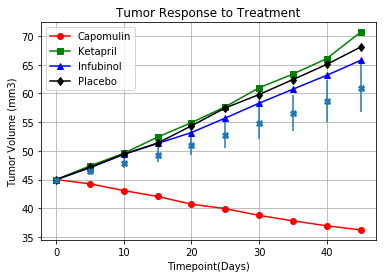

<Figure size 432x288 with 0 Axes>

In [410]:
# Generate the Plot (with Error Bars)
# X axius must be 10 points long (50/5) to match up with the number of timepoints (0-45, in intervals of 5 is 10 instances)
x_axis = np.arange(0, 50, 5)

cap_vol_mean=vol_mean_2.loc[[0,5,10,15,20,25,30,35,40,45], 'Capomulin']
cap_vol_sem=vol_sem_2.loc[[0,5,10,15,20,25,30,35,40,45], 'Capomulin']


ket_vol_mean=vol_mean_2.loc[[0,5,10,15,20,25,30,35,40,45], 'Ketapril']

inf_vol_mean=vol_mean_2.loc[[0,5,10,15,20,25,30,35,40,45], 'Infubinol']

placebo_vol_mean=vol_mean_2.loc[[0,5,10,15,20,25,30,35,40,45], 'Placebo']
placebo_vol_sem=vol_sem_2.loc[[0,5,10,15,20,25,30,35,40,45], 'Placebo']

#Plot Capomulin
plt.plot(x_axis,cap_vol_mean,linestyle='-', marker='o',color='red')

# Plot Ketapril
plt.plot(x_axis,ket_vol_mean,linestyle='-', marker='s',color='green')

#Plot Infubinol
plt.plot(x_axis,inf_vol_mean,linestyle='-', marker='^',color='blue')

#Plot Placebo
plt.plot(x_axis,placebo_vol_mean,linestyle='-', marker='d',color='black')
#cap_vol_scat = plt.scatter(x_axis,cap_vol_mean,marker = 'o',facecolors="red",edgecolors="black", label="Capomulin")
#cap_vol_line=plt.plot(x_axis, vol_mean_2.loc[[0,5,10,15,20,25,30,35,40,45],'Capomulin'], color='red')

#ket_vol_scat = plt.scatter(x_axis, vol_mean_2.loc[[0,5,10,15,20,25,30,35,40,45], 'Ketapril'],marker = 's',color="green", label="Ketapril")
#ket_vol_line=plt.plot(x_axis, vol_mean_2.loc[[0,5,10,15,20,25,30,35,40,45],'Ketapril'], color='green')

#inf_vol_scat = plt.scatter(x_axis, vol_mean_2.loc[[0,5,10,15,20,25,30,35,40,45], 'Infubinol'],marker='^',color="blue", label="Infubinol")
#inf_vol_line=plt.plot(x_axis, vol_mean_2.loc[[0,5,10,15,20,25,30,35,40,45],'Infubinol'], color='blue')

#placebo_vol_scat = plt.scatter(x_axis, vol_mean_2.loc[[0,5,10,15,20,25,30,35,40,45], 'Placebo'],marker='d',color="black", label="Placebo")
#placebo_vol_line=plt.plot(x_axis, vol_mean_2.loc[[0,5,10,15,20,25,30,35,40,45],'Placebo'], color='black')


# Plot error bar: Calc mean for each time point and store in tuple,set average 
plt.errorbar(x_axis, mean_list, yerr=errors_list, fmt="X")
plt.grid()
plt.title("Tumor Response to Treatment")
plt.xlabel('Timepoint(Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend(loc="best")

#plt.plot(x, y, '-ok')
#plt.hlines(0, 0, 10, alpha=0.25)
plt.show()
plt1=plt
# Save the Figure
####MUST SAVE#######
plt.savefig("Tumor_Response.jpg")

<ErrorbarContainer object of 3 artists>

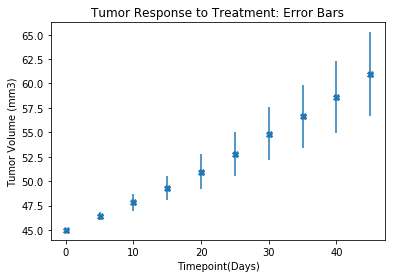

In [411]:
twenty_e


plt.title("Tumor Response to Treatment: Error Bars")
plt.xlabel('Timepoint(Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.errorbar(x_axis, mean_list, yerr=errors_list, fmt="X")


## Metastatic Response to Treatment

In [412]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Add .reset_index() to end of line to make it a df (has to have an index).
meta_mean=df2.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean().reset_index()

#sets Drug & Timepoint as index, in that order
meta_mean.set_index(['Drug','Timepoint'], inplace=True)

#meta_mean.set_index('Drug')
# Preview DataFrame
meta_mean.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [413]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Add .reset_index() to end of line to make it a df (has to have an index).
meta_sem=df2.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem().reset_index()

#sets Drug & Timepoint as index, in that order
meta_sem.set_index(['Drug','Timepoint'], inplace=True)

#meta_mean.set_index('Drug')
# Preview DataFrame
meta_sem.rename(columns={meta_sem.columns[0]: "Metastatic Sites SEM"}, inplace=True)
meta_sem.head()

Metastatic Sites SEM
Drug      Timepoint                      
Capomulin 0                      0.000000
          5                      0.074833
          10                     0.125433
          15                     0.132048
          20                     0.161621

In [414]:
# Minor Data Munging to Re-Format the Data Frames
# In .pivot_table function: (values to fill table, Rows, Columns)
meta_mean_2=meta_mean.pivot_table('Metastatic Sites',['Timepoint'],'Drug')
meta_sem_2=meta_sem.pivot_table('Metastatic Sites SEM',['Timepoint'],'Drug')

meta_mean_2.index.astype(int)
meta_mean_2
meta_sem_2

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


In [415]:
### MUCH SIMPLER VERSION of loop through all means from first visualization

meta_means=[]
meta_sems=[]

for index, row in meta_mean_2.iterrows():
    meta_means.append(row.mean())

for index, row in meta_mean_2.iterrows():
    meta_sems.append(row.sem())
   
    
# Tried it this way first, but shouldn;t take the mean of the sem. Need the sem of all of the elements of the row
#for index, row in meta_sem_2.iterrows():
#    meta_sems.append(row.mean())    
    
    
    
    
meta_sems


[0.0,
 0.028387582264466586,
 0.05234233724336809,
 0.08233923503919331,
 0.10462056815769044,
 0.12470369418314957,
 0.14960482792608334,
 0.1750195707978052,
 0.2171099550786934,
 0.23538276690810256]

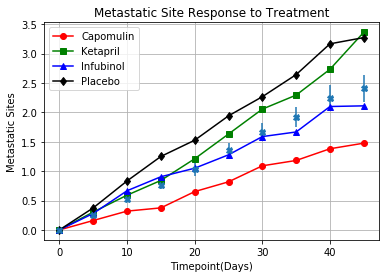

In [416]:
# Generate the Plot (with Error Bars)
# X axius must be 10 points long (50/5) to match up with the number of timepoints (0-45, in intervals of 5 is 10 instances)
# Code below shows variations of numerours ways to do this.

cap_meta_mean=meta_mean_2.loc[[0,5,10,15,20,25,30,35,40,45], 'Capomulin']
ket_meta_mean=meta_mean_2.loc[[0,5,10,15,20,25,30,35,40,45], 'Ketapril']
inf_meta_mean=meta_mean_2.loc[[0,5,10,15,20,25,30,35,40,45], 'Infubinol']
x_axis = np.arange(0, 50, 5)

#Plot Capomulin. Pseudocode driectly below explains differenceb between two solutions
# First solution was to plot scatter and line seperately. New solution combines both into one line with plt.plot
plt.plot(x_axis,cap_meta_mean,linestyle='-', marker='o',color='red')
#cap_meta_scat = plt.scatter(x_axis, meta_mean_2.loc[[0,5,10,15,20,25,30,35,40,45], 'Capomulin'],marker = 'o',facecolors="red",edgecolors="black", label="Capomulin")
#cap_meta_line=plt.plot(x_axis, meta_mean_2.loc[[0,5,10,15,20,25,30,35,40,45],'Capomulin'], color='red')

#Plot Ketapril
plt.plot(x_axis,ket_meta_mean,linestyle='-', marker='s',color='green')

#Plot Infubinol. Pseudocode driectly below explains differenceb between two solutions
plt.plot(x_axis,inf_meta_mean,linestyle='-', marker='^',color='blue')
# First solution was to plot scatter and line seperately. New solution combines both into one line with plt.plot
#inf_meta_scat = plt.scatter(x_axis, inf_meta_mean,marker='^',color="blue", label="Infubinol")
#inf_meta_line=plt.plot(x_axis, inf_meta_mean, color='blue')

# Plot Placebo
plt.plot(x_axis,meta_mean_2.loc[[0,5,10,15,20,25,30,35,40,45],'Placebo'],linestyle='-', marker='d',color='black')
# Plot the Error Bar
plt.errorbar(x_axis, meta_means, yerr=meta_sems, fmt="X")

plt.grid()
plt.title("Metastatic Site Response to Treatment")
plt.xlabel('Timepoint(Days)')
plt.ylabel('Metastatic Sites')
plt.legend(loc="best")

# Save the Figure
plt.savefig("Metastatic_Response.jpg")
# Show the Figure
plt.show()

Text(0,0.5,'Metastatic Sites')

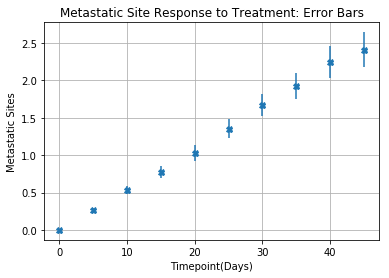

In [417]:
plt.errorbar(x_axis, meta_means, yerr=meta_sems, fmt="X")


plt.grid()
plt.title("Metastatic Site Response to Treatment: Error Bars")
plt.xlabel('Timepoint(Days)')
plt.ylabel('Metastatic Sites')


## Survival Rates

In [418]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
mouse_count=df2.groupby(['Drug','Timepoint'])['Mouse ID'].count().reset_index()
# Preview DataFrame
mouse_count.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [419]:
# Minor Data Munging to Re-Format the Data Frames
# In .pivot_table function: (values to fill table, Rows, Columns)
mouse_count_2=mouse_count.pivot_table('Mouse ID',['Timepoint'],'Drug')

# Preview the Data Frame
mouse_count_2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [420]:
mouse_means=[]
mouse_sems=[]

mouse_percentages = mouse_count_2
#mouse_percentages=mouse_percentages.div(mouse_percentages.iloc[0], axis='columns')
mouse_percentages=((mouse_percentages/mouse_percentages.values[0,:])*100)



# In .pivot_table function: (values to fill table, Rows, Columns)



for index, row in mouse_percentages.iterrows():
    mouse_means.append(row.mean())
 


#mouse_means_2=((mouse_means/mouse_count_2.loc[0].values.mean())*100)    

for index, row in mouse_percentages.iterrows():
    mouse_sems.append(row.sem())




# mouse_means
mouse_means_2
mouse_sems


# Manually check sem value for one row to verify sem calculation is correct
tp_fourfive= [84,52,36,44,52,44,26.9,80,42.3,56]
tp_fourfive_sem=sem(tp_fourfive)
tp_fourfive_sem
#mouse_percentages


5.70702880470896

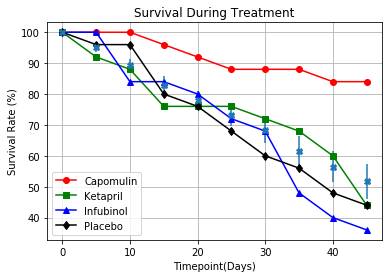

In [421]:
# Generate the Plot (Accounting for percentages)

# Generate the Plot (with Error Bars)
# X axis must be 10 points long (50/5) to match up with the number of timepoints (0-45, in intervals of 5 is 10 instances)
x_axis = np.arange(0, 50, 5)

cap_mouse_count=mouse_count_2.loc[[0,5,10,15,20,25,30,35,40,45], 'Capomulin']
# Need .values, otherwise will produce NaN for all points after the first one
cap_start_count=mouse_count_2.loc[[0],'Capomulin'].values
cap_count_per=((cap_mouse_count/cap_start_count)*100)

ket_mouse_count=mouse_count_2.loc[[0,5,10,15,20,25,30,35,40,45], 'Ketapril']
ket_start_count=mouse_count_2.loc[[0],'Ketapril'].values
ket_count_per=((ket_mouse_count/ket_start_count)*100)

inf_mouse_count=mouse_count_2.loc[[0,5,10,15,20,25,30,35,40,45], 'Infubinol']
inf_start_count=mouse_count_2.loc[[0],'Infubinol'].values
inf_count_per=((inf_mouse_count/inf_start_count)*100)

placebo_mouse_count=mouse_count_2.loc[[0,5,10,15,20,25,30,35,40,45], 'Placebo']
placebo_start_count=mouse_count_2.loc[[0],'Placebo'].values
placebo_count_per=((placebo_mouse_count/placebo_start_count)*100)

#Plot Capomulin
plt.plot(x_axis,cap_count_per,linestyle='-', marker='o',color='red')

# Plot Ketapril
plt.plot(x_axis,ket_count_per,linestyle='-', marker='s',color='green')

#Plot Infubinol
plt.plot(x_axis,inf_count_per,linestyle='-', marker='^',color='blue')

#Plot Placebo
plt.plot(x_axis,placebo_count_per,linestyle='-', marker='d',color='black')

plt.errorbar(x_axis, mouse_means, yerr=mouse_sems, fmt="X")


plt.grid()
plt.title("Survival During Treatment")
plt.xlabel('Timepoint(Days)')
plt.ylabel('Survival Rate (%)')
plt.legend(loc="best")

# Save the Figure
plt.savefig("Mouse_Survival_During_Treatment.jpg")
# Show the Figure
plt.show()

<ErrorbarContainer object of 3 artists>

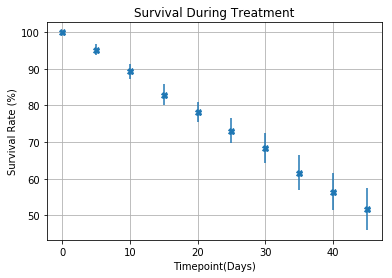

In [422]:

plt.grid()
plt.title("Survival During Treatment")
plt.xlabel('Timepoint(Days)')
plt.ylabel('Survival Rate (%)')
plt.errorbar(x_axis, mouse_means, yerr=mouse_sems, fmt="X")



## Summary Bar Graph

In [423]:
# Calculate the percent changes for each drug
# Multiply by -1 because otherwise the formula will show a dec. as an inc. and vice versa
cap_per_start=(vol_mean_2.loc[[0], 'Capomulin']).values
cap_per_end= (vol_mean_2.loc[[45], 'Capomulin']).values
cap_per_delta=((-1*(cap_per_start-cap_per_end)/(cap_per_start))*100)


cef_per_start=(vol_mean_2.loc[[0], 'Ceftamin']).values
cef_per_end= (vol_mean_2.loc[[45], 'Ceftamin']).values
cef_per_delta=((-1*(cef_per_start-cef_per_end)/(cef_per_start))*100)

start_val=vol_mean_2.loc[0]
end_val=vol_mean_2.loc[45]
num=(start_val-end_val)
vol_mean_2.loc["Percent Change"]=(-1*(num/start_val)*100)

vol_mean_2
changes = vol_mean_2["Percent Change":]
changes.values.astype(float)
changes

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
Percent Change,-19.475303,42.516492,46.123472,57.028795,53.923347,51.29796,47.241175,-22.3209,52.085134,46.579751


In [424]:
changes = vol_mean_2["Percent Change":]
changes_2=changes.values.astype(float)
changes

# Store all Relevant Percent Changes into a Tuple
per_change=vol_mean_2.loc["Percent Change"].tolist()
per_change

passing, failing = [] , []
x = changes.values
# Splice the data between passing and failing drugs
for x in per_change:  
    if x < 0:
        passing.append(x)
        #failing.append(None)
    else:
        failing.append(x)
        #passing.append(None)

passing
failing

# Recombine the lists so that the values are in a list in the same order they will appear on the graph
ordered_pass_fail=passing+failing
# Prepare for merge by transposing and re-indexing
changes_2=changes.transpose()
changes_2.reset_index(level=0, inplace=True)

# Prepare for merge by setting as df and renaming column
ordered_pass_fail_df=pd.DataFrame(ordered_pass_fail)
ordered_pass_fail_df.rename(columns={ordered_pass_fail_df.columns[0]: "Percent Change"}, inplace=True)
# Merge on the % Value changes, with the list in the order you want going first
ordered_frame=pd.merge(ordered_pass_fail_df,changes_2, on ="Percent Change")
ordered_frame
# Pair right name with right bar****************************
drug_names=ordered_frame['Drug']
changes_2

Timepoint,Drug,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


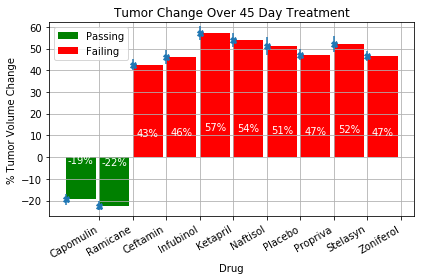

In [425]:
# Orient widths. Add labels, tick marks, etc.
width=(len(passing)+len(failing))
x_axis=np.arange(0,width,1)

fig, ax = plt.subplots()
# specify where on x_axis we want the bars to be plotted. this aligns with ordered_frame
pass_bars=ax.bar(x_axis[0:2], passing,width=.9,align='edge', label='Passing', color='green')
fail_bars=ax.bar(x_axis[2:10], failing,width=.9,align='edge', label='Failing', color = 'red')
pass_bars
fail_bars
legend = ax.legend(loc='center right', fontsize='x-large')        

plt.ylim((min(passing)-5), (max(failing)+5))
plt.grid()
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel('% Tumor Volume Change')
plt.xlabel('Drug')
plt.legend(loc="best")
# Create the ticks for our bar chart's x axis

tick_locations = [(value+1) for value in x_axis]
# See one box above for how drug names were ordered to align with graph
plt.xticks(tick_locations, drug_names)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

# Call functions to implement the function calls
def label(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .2*height,
                ('{0:.0f}%'.format(height)),
                ha='center',color='w', va='bottom')

label(pass_bars)
label(fail_bars)

# Resize plot to display labels
plt.tight_layout()

# Create df only for timepoints 0 & 45 (this excludes mice that passed away before timepoint 45)
df8=df2[(df2['Timepoint'] == 45) | (df2['Timepoint'] == 0)]

# In .pivot_table function: (values to fill table, Rows, Columns)
df8['Mouse ID'].astype(str)
df8=df8.pivot_table('Tumor Volume (mm3)',['Mouse ID','Drug'],'Timepoint')

df8.sort_values(by=['Mouse ID'], ascending=True)

# Add change over time column
df8['Change Over 45 Days']=(df8[45])-(df8[0])
# Convert Change over time to percent
df8['% Change 45 Days'] = ((df8['Change Over 45 Days']/df8[0])*100)

# Create new df to avoid accidentally deleting anything. 
df9=df8
# Delete unnecessary rows
del df9[0]   
del df9[45]
del df8['Change Over 45 Days']
df9.reset_index()
# Reformat df9
df10=df9.pivot_table('% Change 45 Days',['Mouse ID'],'Drug')
# Transpose to prepare for loop using iterrows()
df11=df10.transpose()

column_sems=[]
for index, row in df11.iterrows():
    column_sems.append(row.sem())

plt.errorbar(x_axis, ordered_pass_fail, yerr=column_sems, fmt="X")

# Save the Figure
plt.savefig("final.jpg")
# Show the Figure
fig.show()

<ErrorbarContainer object of 3 artists>

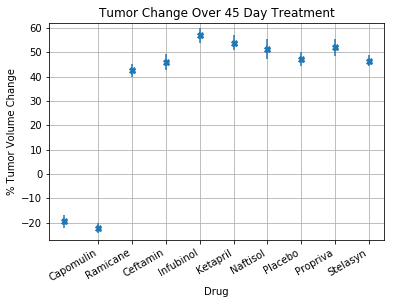

In [426]:

fig, ax = plt.subplots()


plt.ylim((min(passing)-5), (max(failing)+5))
plt.grid()
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel('% Tumor Volume Change')
plt.xlabel('Drug')
tick_locations = [(value+1) for value in x_axis]
# See one box above for how drug names were ordered to align with graph
plt.xticks(tick_locations, drug_names)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')



plt.errorbar(x_axis, ordered_pass_fail, yerr=column_sems, fmt="X")



In [427]:
df8=df2[(df2['Timepoint'] == 45) | (df2['Timepoint'] == 0)]

# In .pivot_table function: (values to fill table, Rows, Columns)
df8['Mouse ID'].astype(str)
df8=df8.pivot_table('Tumor Volume (mm3)',['Mouse ID','Drug'],'Timepoint')

df8.sort_values(by=['Mouse ID'], ascending=True)

df8['Change Over 45 Days']=(df8[45])-(df8[0])
df8['% Change 45 Days'] = ((df8['Change Over 45 Days']/df8[0])*100)

df9=df8
del df9[0]   
del df9[45]
del df8['Change Over 45 Days']
df9.reset_index()
df10=df9.pivot_table('% Change 45 Days',['Mouse ID'],'Drug')
df11=df10.transpose()

column_sems=[]
for index, row in df11.iterrows():
    column_sems.append(row.sem())

column_sems

#df10["Capomulin"].sem()

[2.7199498993777125,
 2.0052393288168533,
 2.5431719632306096,
 3.2293032796501797,
 3.147473933982257,
 3.0038346563337956,
 4.196857012434533,
 2.7262333052535404,
 3.5034578246480343,
 2.230168406199868]